In [28]:
%load_ext autoreload

%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session
from spikeA.Dat_file_reader import Dat_file_reader
from spikeA.Intervals import Intervals
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
path="/adata/electro/bt8564/bt8564-21072021-0105/"
name="bt8564-21072021-0105"

Check the files

## Get a Session object and load spikes

In [3]:
ses = Kilosort_session(name=name,path=path)
ses.load_parameters_from_files()
print(ses)

<class 'spikeA.Session.Kilosort_session'>
name = bt8564-21072021-0105
path = /adata/electro/bt8564/bt8564-21072021-0105
subject = bt8564
session_dat_time = 2021-07-21 01:05:00
fileBase = /adata/electro/bt8564/bt8564-21072021-0105/bt8564-21072021-0105
file_names = {'par': '/adata/electro/bt8564/bt8564-21072021-0105/bt8564-21072021-0105.par', 'desen': '/adata/electro/bt8564/bt8564-21072021-0105/bt8564-21072021-0105.desen', 'desel': '/adata/electro/bt8564/bt8564-21072021-0105/bt8564-21072021-0105.desel', 'sampling_rate': '/adata/electro/bt8564/bt8564-21072021-0105/bt8564-21072021-0105.sampling_rate_dat', 'px_per_cm': '/adata/electro/bt8564/bt8564-21072021-0105/bt8564-21072021-0105.px_per_cm', 'params': '/adata/electro/bt8564/bt8564-21072021-0105/params.py', 'amplitudes': '/adata/electro/bt8564/bt8564-21072021-0105/amplitudes.npy', 'channel_map': '/adata/electro/bt8564/bt8564-21072021-0105/channel_map.npy', 'channel_positions': '/adata/electro/bt8564/bt8564-21072021-0105/channel_positions.

In [4]:
stl = Spike_train_loader()
stl.load_spike_train_kilosort(ses)
cg = Cell_group(stl)

Number of good clusters: 67


## Create a pose file 

In [94]:
ap = Animal_pose(ses)
ap.pose_from_positrack_files(ses=ses, interpolation_frequency_hz = 50,extension="trk")
ap.save_pose_to_file() # save the file for next time
#ap.load_pose_from_file()

Interpolation step: 400.0 samples
/adata/electro/bt8564/bt8564-21072021-0105/bt8564-21072021_01.dat
/adata/electro/bt8564/bt8564-21072021-0105/bt8564-21072021_01.trk
Number of ttl pulses detected: 31138
Number of lines in positrack file: 31138
(31138, 5)
Invalid values: 5478
Valid values: 150212
Percentage of invalid values: 3.52%
/adata/electro/bt8564/bt8564-21072021-0105/bt8564-21072021_02.dat
/adata/electro/bt8564/bt8564-21072021-0105/bt8564-21072021_02.trk
Number of ttl pulses detected: 15559
Number of lines in positrack file: 15559
(15559, 5)
Invalid values: 1160
Valid values: 76635
Percentage of invalid values: 1.49%
/adata/electro/bt8564/bt8564-21072021-0105/bt8564-21072021_03.dat
/adata/electro/bt8564/bt8564-21072021-0105/bt8564-21072021_03.trk
Number of ttl pulses detected: 30740
Number of lines in positrack file: 30740
(30740, 5)
Invalid values: 4843
Valid values: 148857
Percentage of invalid values: 3.15%
/adata/electro/bt8564/bt8564-21072021-0105/bt8564-21072021_04.dat
/ada

Plot the path of the animal to see if it was loaded correctly.

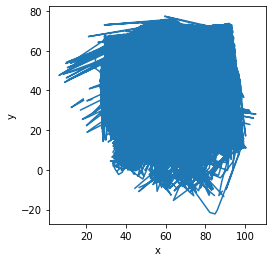

In [6]:
plt.plot(ap.pose[:,1],ap.pose[:,2])
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal', adjustable='box')

Plot the head-direction of the animal and its position a short segment.

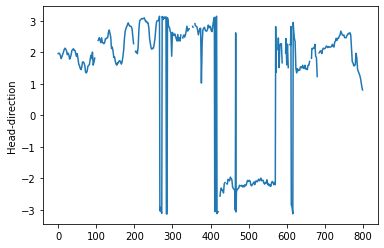

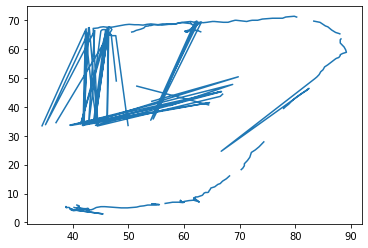

In [7]:
s=3000
e=3800
plt.plot(ap.pose[s:e,4])
plt.ylabel("Head-direction")
plt.show()
plt.plot(ap.pose[s:e,1],ap.pose[s:e,2])

Now we need to set the SpatialProperties object of each Neuron objects of the CellGroup.
Then we can get information score for each neuron from a firing rate map without smoothing.
We recalculate the maps with smoothing for display purposes.

616505 invalid rows out of 849324, % invalid: 72.59


Text(0.5, 0, 'Head direction (deg)')

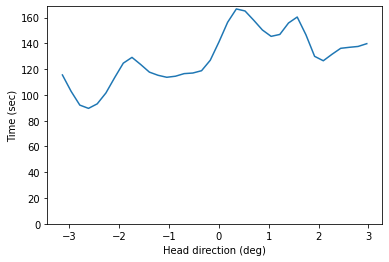

In [8]:
ap.head_direction_occupancy_histogram()
plt.plot(ap.hd_occupancy_bins[:-1],ap.hd_occupancy_histogram)
plt.ylim(0,np.max(ap.hd_occupancy_histogram)+2)
plt.ylabel("Time (sec)")
plt.xlabel("Head direction (deg)")

## Limit analysis to a particular trial

You can get the time intervals for each trial from the session object.

* Get the time at which each trial starts and ends
* Set the intervals in the spike train object. 
* Set the intervals in the animal_pose object. 

In [59]:
print(ses.trial_intervals.inter)
print(ses.desen)
sqr70_indices = [i for i, j in enumerate(ses.desen) if j == 'sqr70']
circ80_indices = [i for i, j in enumerate(ses.desen) if j == 'circ80']

first_sqr70_inter = ses.trial_intervals.inter[sqr70_indices[0:1],:] # first sqr70
last_sqr70_inter = ses.trial_intervals.inter[sqr70_indices[-1:],:] # last sqr70
first_circ80_inter = ses.trial_intervals.inter[circ80_indices[0:1],:] # first circ80

print(first_sqr70_inter)
print(last_sqr70_inter)
print(first_circ80_inter)

[[   0.      1258.88395]
 [1258.884   1895.75995]
 [1895.76    3135.77995]
 [3135.78    3783.99595]
 [3783.996   5023.61995]]
['sqr70', 'rb', 'circ80', 'rb', 'sqr70']
[[   0.      1258.88395]]
[[3783.996   5023.61995]]
[[1895.76    3135.77995]]


In [91]:
ap = Animal_pose(ses)
ap.load_pose_from_file()
print("min {}, max {}".format(ap.pose[:,0].min(),ap.pose[:,0].max()))
first_circ80_inter


Loading original pose from /adata/electro/bt8564/bt8564-21072021-0105/bt8564-21072021-0105.pose.npy
min 0.0, max 16986.46


array([[1895.76   , 3135.77995]])

In [ ]:
ap = Animal_pose(ses)
ap.load_pose_from_file()

plt.scatter(ap.pose[:,0],ap.pose[:,1])
plt.show()
print("Time {}".format(ap.intervals.total_interval_duration_seconds()))


ap.set_intervals(first_sqr70_inter)
plt.scatter(ap.pose[:,1],ap.pose[:,2])
plt.show()
print("Time {}".format(ap.intervals.total_interval_duration_seconds()))
ap.occupancy_map_2d()
plt.imshow(ap.occupancy_map)
plt.show()



ap.unset_intervals()
ap.set_intervals(first_circ80_inter)
plt.scatter(ap.pose[:,1],ap.pose[:,2])
plt.show()
print("Time {}".format(ap.intervals.total_interval_duration_seconds()))
ap.occupancy_map_2d()
plt.imshow(ap.occupancy_map)
plt.show()


ap.unset_intervals()
ap.set_intervals(last_sqr70_inter)
plt.scatter(ap.pose[:,1],ap.pose[:,2])
plt.show()
print("Time {}".format(ap.intervals.total_interval_duration_seconds()))
ap.occupancy_map_2d()
plt.imshow(ap.occupancy_map)
plt.show()



In [131]:
n.spike_train.unset_intervals()
%time n.spike_train.set_intervals(first_sqr70_inter)



CPU times: user 240 ms, sys: 3.95 ms, total: 244 ms
Wall time: 245 ms


In [130]:
ap.unset_intervals()
%time ap.set_intervals(first_circ80_inter)

CPU times: user 1.48 s, sys: 0 ns, total: 1.48 s
Wall time: 1.48 s


Time in animal pose: 1258.88395 sec
Time in animal pose: 1240.01995 sec
Time in animal pose: 1239.6239500000001 sec


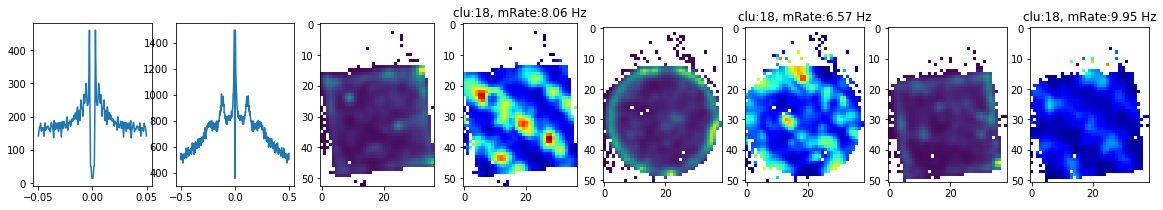

In [126]:
n = cg.neuron_list[0]
fig, axs = plt.subplots(1,8,figsize=(20,3))
n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0005,min_sec=-0.05, max_sec=0.05)
timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
axs[0].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0025,min_sec=-0.5, max_sec=0.5)
timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
axs[1].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])




n.spike_train.unset_intervals()
ap.unset_intervals()
n.spike_train.set_intervals(first_sqr70_inter)
ap.set_intervals(first_sqr70_inter)
print("Time in animal pose: {} sec".format(ap.intervals.total_interval_duration_seconds()))
n.set_spatial_properties(ap)
ap.occupancy_map_2d()
axs[2].imshow(ap.occupancy_map)
n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
im = axs[3].imshow(n.spatial_properties.firing_rate_map,cmap='jet')
axs[3].set_title("clu:{}, mRate:{:.3} Hz".format(n.name,n.spike_train.mean_firing_rate()))


n.spike_train.unset_intervals()
ap.unset_intervals()
n.spike_train.set_intervals(first_circ80_inter)
ap.set_intervals(first_circ80_inter)
print("Time in animal pose: {} sec".format(ap.intervals.total_interval_duration_seconds()))
ap.occupancy_map_2d()
axs[4].imshow(ap.occupancy_map)
n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
im = axs[5].imshow(n.spatial_properties.firing_rate_map,cmap='jet')
axs[5].set_title("clu:{}, mRate:{:.3} Hz".format(n.name,n.spike_train.mean_firing_rate()))


n.spike_train.unset_intervals()
ap.unset_intervals()
n.spike_train.set_intervals(last_sqr70_inter)
ap.set_intervals(last_sqr70_inter)
print("Time in animal pose: {} sec".format(ap.intervals.total_interval_duration_seconds()))
ap.occupancy_map_2d()
axs[6].imshow(ap.occupancy_map)
n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
im = axs[7].imshow(n.spatial_properties.firing_rate_map,cmap='jet')
axs[7].set_title("clu:{}, mRate:{:.3} Hz".format(n.name,n.spike_train.mean_firing_rate()))







plt.show()

In [37]:
ap.set_intervals(first_sqr70_inter)

Number of poses: 62945


Loop for our neurons and do the analysis we need to know if we have spatially selective neurons or head-direction cells

In [125]:
fig, axs = plt.subplots(len(cg.neuron_list),8,figsize=(25,200))
   
for i, n in enumerate(tqdm(cg.neuron_list)):
    n.spike_train.unset_intervals()
    
    n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0005,min_sec=-0.05, max_sec=0.05)
    timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
    axs[i,0].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
    n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0025,min_sec=-0.5, max_sec=0.5)
    timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
    axs[i,1].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
    
    for j, interv in enumerate([first_sqr70_inter,first_circ80_inter,last_sqr70_inter]):
        n.spike_train.unset_intervals()
        ap.unset_intervals()
        
        n.spike_train.set_intervals(interv)
        ap.set_intervals(interv)
        
        n.set_spatial_properties(ap)
        n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
        im = axs[i,2+j*2].imshow(n.spatial_properties.firing_rate_map,cmap='jet')
        axs[i,2+j*2].set_title("clu:{}, mRate:{:.3} Hz".format(n.name,n.spike_train.mean_firing_rate()))
        fig.colorbar(im,ax=axs[i,2+j*2])
    
        n.spatial_properties.firing_rate_head_direction_histogram(smoothing=False)
        axs[i,3+j*2].plot(n.spatial_properties.firing_rate_head_direction_histo_edges[:-1],n.spatial_properties.firing_rate_head_direction_histo)
        axs[i,3+j*2].set_xlabel("Head direction")
        axs[i,3+j*2].set_ylabel("Firing rate (Hz)")
        axs[i,3+j*2].set_ylim(0,np.max(n.spatial_properties.firing_rate_head_direction_histo)+1)
plt.show()
#plt.savefig('/home/moritz/Downloads/TYY5630-100721-0101.pdf')

  3%|▎         | 2/67 [00:18<10:07,  9.35s/it]


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f1330a882f0> (for post_execute):


KeyboardInterrupt: 